In [125]:
import requests as r
from dotenv import load_dotenv
load_dotenv()
import os
key = os.getenv("RIOTKEY")
import pandas as pd
import matplotlib.pyplot as plt
import tqdm

In [2]:
username = "idashhe"
headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/99.0.4844.51 Safari/537.36",
    "Accept-Language": "en-GB,en-US;q=0.9,en;q=0.8",
    "Accept-Charset": "application/x-www-form-urlencoded; charset=UTF-8",
    "Origin": "https://developer.riotgames.com",
    "X-Riot-Token": key
}

In [3]:
response = r.get(f"https://na1.api.riotgames.com/lol/summoner/v4/summoners/by-name/{username}",headers=headers)
body = response.json()
puuid = body["puuid"]
print(puuid)

OAZVEmbLTrBSLLkjJes4AbQXlua8fT89_gCkNZiRzDDKWj_7IHew4gxMen7gILrQJgFebehnKcU2yA


In [122]:
response = r.get(f"https://americas.api.riotgames.com/lol/match/v5/matches/by-puuid/{puuid}/ids?start=300&count=100&type=ranked",headers=headers)
matches = response.json()

In [123]:
matches

['NA1_4216046755',
 'NA1_4215962682',
 'NA1_4215927461',
 'NA1_4215889619',
 'NA1_4215839660',
 'NA1_4215794694',
 'NA1_4215490908',
 'NA1_4215447200',
 'NA1_4215462110',
 'NA1_4214391219',
 'NA1_4214353657',
 'NA1_4214009487',
 'NA1_4214015614',
 'NA1_4213891908',
 'NA1_4213847225',
 'NA1_4213872594',
 'NA1_4213789044',
 'NA1_4213810516',
 'NA1_4213754560',
 'NA1_4213263009',
 'NA1_4213139433',
 'NA1_4213146269',
 'NA1_4213144408',
 'NA1_4213066742',
 'NA1_4212876312',
 'NA1_4212817799',
 'NA1_4212769485',
 'NA1_4212697802',
 'NA1_4211175713',
 'NA1_4211058150',
 'NA1_4211053544',
 'NA1_4210855823',
 'NA1_4210891677',
 'NA1_4210850260',
 'NA1_4210798638',
 'NA1_4210816567',
 'NA1_4210814586',
 'NA1_4210777983',
 'NA1_4210776260',
 'NA1_4210647511',
 'NA1_4210612231',
 'NA1_4210576651',
 'NA1_4210559932',
 'NA1_4210511614',
 'NA1_4210436305',
 'NA1_4210405689',
 'NA1_4210316923',
 'NA1_4210257855',
 'NA1_4210261652',
 'NA1_4209882703',
 'NA1_4209875081',
 'NA1_4209834169',
 'NA1_420983

In [124]:
all_participant_data = []
all_timelines = []
for match in tqdm(matches):
    try:
        response = r.get(f"https://americas.api.riotgames.com/lol/match/v5/matches/{match}",headers=headers)
        match_data = response.json()
        participants = pd.DataFrame(match_data["info"]["participants"])[["participantId","summonerName","individualPosition","teamId","championName"]]
        participants["match"] = match
        all_participant_data.append(participants)
        response = r.get(f"https://americas.api.riotgames.com/lol/match/v5/matches/{match}/timeline",headers=headers)
        timeline = response.json()
        actions = []
        for frame in timeline["info"]["frames"]:
            actions.extend(frame["events"])
        example_timeline = pd.DataFrame(actions)
        example_timeline["match"] = match
        all_timelines.append(example_timeline)
        sleep(5)
    except Exception as e:
        print(match,str(e))

NA1_4209882703 'info'
NA1_4209875081 'info'
NA1_4209834169 'info'
NA1_4209831530 'info'
NA1_4209820706 'info'
NA1_4209777737 'info'
NA1_4209785795 'info'
NA1_4209801107 'info'
NA1_4209729518 'info'
NA1_4209747377 'info'
NA1_4209716168 'info'
NA1_4209753315 'info'
NA1_4209712857 'info'
NA1_4209739915 'info'
NA1_4209648807 'info'
NA1_4209666162 'info'
NA1_4209692603 'info'
NA1_4209670796 'info'
NA1_4209628303 'info'
NA1_4209581261 'info'
NA1_4209546229 'info'
NA1_4209550458 'info'
NA1_4209409692 'info'
NA1_4209410696 'info'
NA1_4209309410 'info'
NA1_4209283685 'info'
NA1_4209244547 'info'
NA1_4208291282 'info'
NA1_4208268883 'info'
NA1_4208228541 'info'
NA1_4208226271 'info'
NA1_4208253900 'info'
NA1_4208220907 'info'
NA1_4208216459 'info'
NA1_4208182941 'info'
NA1_4208147354 'info'
NA1_4208100760 'info'
NA1_4208073827 'info'
NA1_4208029691 'info'
NA1_4208012977 'info'
NA1_4207943877 'info'
NA1_4207867732 'info'
NA1_4207826596 'info'
NA1_4207768566 'info'
NA1_4207320578 'info'
NA1_420726

In [126]:
match_parts = pd.concat(all_participant_data)
match_time = pd.concat(all_timelines)

In [127]:
match_parts.to_csv("match_participants.csv")
match_time.to_csv("match_time.csv")

In [128]:
kills = match_time[match_time["type"]=="CHAMPION_KILL"]

In [129]:
kills

,realTimestamp,timestamp,type,itemId,participantId,levelUpType,skillSlot,creatorId,wardType,assistingParticipantIds,...,goldGain,buildingType,towerType,multiKillLength,actualStartTime,gameId,winningTeam,match,name,transformType
45,NaN,100313,CHAMPION_KILL,NaN,NaN,NaN,NaN,NaN,NaN,"[7, 9, 10]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA1_4216046755,NaN,NaN
47,NaN,105124,CHAMPION_KILL,NaN,NaN,NaN,NaN,NaN,NaN,"[8, 9]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA1_4216046755,NaN,NaN
64,NaN,148891,CHAMPION_KILL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA1_4216046755,NaN,NaN
70,NaN,157189,CHAMPION_KILL,NaN,NaN,NaN,NaN,NaN,NaN,[8],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA1_4216046755,NaN,NaN
80,NaN,173974,CHAMPION_KILL,NaN,NaN,NaN,NaN,NaN,NaN,[10],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA1_4216046755,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,NaN,1207394,CHAMPION_KILL,NaN,NaN,NaN,NaN,NaN,NaN,[5],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA1_4210261652,NaN,NaN
630,NaN,1272163,CHAMPION_KILL,NaN,NaN,NaN,NaN,NaN,NaN,[10],...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA1_4210261652,NaN,NaN
631,NaN,1280065,CHAMPION_KILL,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA1_4210261652,NaN,NaN
633,NaN,1284659,CHAMPION_KILL,NaN,NaN,NaN,NaN,NaN,NaN,"[3, 4]",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NA1_4210261652,NaN,NaN


In [130]:
relevant = []
for col in kills.columns:
    if len([x for x in kills[col].isna() if x]) < 1:
        relevant.append(col)
cleaned = kills[relevant]

In [131]:
cleaned["x"] = [x["x"] for x in cleaned["position"]]
cleaned["y"] = [x["y"] for x in cleaned["position"]]

C:\Users\eric\AppData\Local\Temp/ipykernel_13656/2112546686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["x"] = [x["x"] for x in cleaned["position"]]
C:\Users\eric\AppData\Local\Temp/ipykernel_13656/2112546686.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["y"] = [x["y"] for x in cleaned["position"]]


In [132]:
roles = []
teams = []
champs = []
ismyteams = []
summonernames = []
for row in cleaned.iterrows():
    try:
        killerId = int(row[1]["killerId"])
        match = row[1]["match"]
        da_match = match_parts[(match_parts["match"]==match) & (match_parts["participantId"]==killerId)].iloc[0]
        role = da_match["individualPosition"]
        team = da_match["teamId"]
        champ = da_match["championName"]
        summonerName = da_match["summonerName"]
        my_team = match_parts[(match_parts["match"]==match) & (match_parts["summonerName"]=="idashhe")].iloc[0]["teamId"]
        ismyteam = team == my_team
        roles.append(role)
        teams.append(team)
        ismyteams.append(ismyteam)
        champs.append(champ)
        summonernames.append(summonerName)
    except:
        roles.append("idk")
        summonernames.append("idk")
        teams.append("idk")
        ismyteams.append("idk")
        champs.append("idk")
cleaned["killerRole"] = roles
cleaned["killerTeam"] = teams
cleaned["killerChamp"] = champs
cleaned["killerismyteam"] = ismyteams
cleaned["killerSummonerName"] = summonernames
roles = []
teams = []
champs = []
for row in cleaned.iterrows():
    try:
        killerId = int(row[1]["victimId"])
        match = row[1]["match"]
        da_match = match_parts[(match_parts["match"]==match) & (match_parts["participantId"]==killerId)].iloc[0]
        role = da_match["individualPosition"]
        team = da_match["teamId"]
        champ = da_match["champName"]
        roles.append(role)
        teams.append(team)
        champs.append(champ)
    except:
        roles.append("idk")
        teams.append("idk")
        champs.append("idk")
cleaned["victimRole"] = roles
cleaned["victimTeam"] = teams
cleaned["victimChamp"] = champs

C:\Users\eric\AppData\Local\Temp/ipykernel_13656/2154893020.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["killerRole"] = roles
C:\Users\eric\AppData\Local\Temp/ipykernel_13656/2154893020.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["killerTeam"] = teams
C:\Users\eric\AppData\Local\Temp/ipykernel_13656/2154893020.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the ca

In [133]:
cleaned.to_csv("kills")

In [134]:
cleaned["count"] = 1

C:\Users\eric\AppData\Local\Temp/ipykernel_13656/826903056.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned["count"] = 1


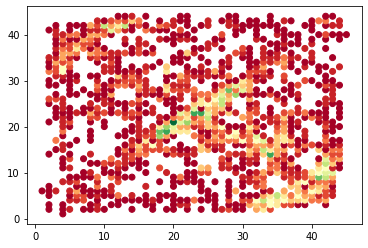

In [135]:
rounding_value = 2.5
viz = cleaned.copy()
viz["x_rounded"] = [int(x / (10 ** rounding_value)) for x in viz["x"]]
viz["y_rounded"] = [int(x / (10 ** rounding_value)) for x in viz["y"]]
summarized = viz.groupby(["x_rounded","y_rounded"]).sum().reset_index()
plt.scatter(summarized["x_rounded"],summarized["y_rounded"],c=summarized["count"],cmap="RdYlGn")

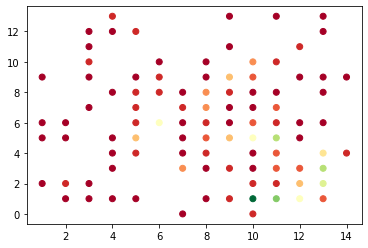

In [136]:
rounding_value = 3
viz = cleaned[cleaned["killerSummonerName"]==username].copy()
viz["x_rounded"] = [int(x / (10 ** rounding_value)) for x in viz["x"]]
viz["y_rounded"] = [int(x / (10 ** rounding_value)) for x in viz["y"]]
summarized = viz.groupby(["x_rounded","y_rounded"]).sum().reset_index()
plt.scatter(summarized["x_rounded"],summarized["y_rounded"],c=summarized["count"],cmap="RdYlGn")

In [137]:
summarized.sort_values("count",ascending=False).head(10)

,x_rounded,y_rounded,timestamp,bounty,killStreakLength,killerId,shutdownBounty,victimId,x,y,count
60,10,1,7625270,3760.0,9.0,107.0,0.0,68.0,136980,18137,13
70,11,1,5253018,3014.0,12.0,75.0,150.0,56.0,114665,16435,10
89,13,3,3627483,2867.0,3.0,46.0,0.0,71.0,120190,30315,9
74,11,5,11228156,2350.0,16.0,56.0,50.0,49.0,103319,50488,9
88,13,2,4571725,2267.0,11.0,47.0,50.0,59.0,107198,22474,8
80,12,1,5380945,2074.0,9.0,48.0,0.0,47.0,87187,11166,7
64,10,5,9894656,1949.0,3.0,38.0,500.0,46.0,73879,37125,7
30,6,6,10023084,2019.0,6.0,48.0,600.0,36.0,46110,45051,7
90,13,4,3896590,1774.0,6.0,24.0,0.0,57.0,81803,25807,6
24,5,5,6106866,1474.0,3.0,25.0,200.0,33.0,28022,27965,5


In [138]:
early_game = cleaned[cleaned["timestamp"]<900000]

In [139]:
early_game.index.size

1056

In [140]:
role = "JUNGLE"
champ = "MasterYi"
rounding_value = 1
jungle_path = early_game[(early_game["killerRole"]==role) & (early_game["killerChamp"]==champ) & (early_game["killerismyteam"]==False)].copy()
jungle_path["x_rounded"] = [int(x / (10 ** rounding_value)) for x in jungle_path["x"]]
jungle_path["y_rounded"] = [int(x / (10 ** rounding_value)) for x in jungle_path["y"]]
summarized = jungle_path.groupby(["x_rounded","y_rounded"]).sum().reset_index()

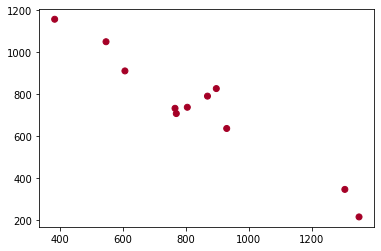

In [141]:
plt.scatter(summarized["x_rounded"],summarized["y_rounded"],c=summarized["count"],cmap="RdYlGn")

In [142]:
roles = early_game["killerRole"].unique()
match_analysises = []
for match in early_game["match"].unique():
    match_data = early_game[early_game["match"]==match]
    for role in roles:
        match_analysis = {}
        my_team_role_kill_count = match_data[(match_data["killerismyteam"]==True) & \
                                             (match_data["killerRole"]==role)].index.size
        enemy_team_role_kill_count = match_data[(match_data["killerismyteam"]==False) & \
                                             (match_data["killerRole"]==role)].index.size
        match_analysis[f"my_team_kc"] = my_team_role_kill_count
        match_analysis[f"enemy_team_kc"] = enemy_team_role_kill_count
        match_analysis["role"] = role
        match_analysis["match"] = match
        match_analysises.append(match_analysis)

In [143]:
manalysis = pd.DataFrame(match_analysises)
manalysis["advantage"] = manalysis["my_team_kc"] >= manalysis["enemy_team_kc"]
manalysis["quant_advantage"] = manalysis["my_team_kc"] - manalysis["enemy_team_kc"]

In [144]:
len(manalysis["match"].unique())

49

In [145]:
role = "BOTTOM"
role_manalysis = manalysis[manalysis["role"]==role]
adcount = role_manalysis[role_manalysis["advantage"]==True].index.size
disadcount = role_manalysis[role_manalysis["advantage"]==False].index.size
quantad = role_manalysis["quant_advantage"].mean()
print(adcount,disadcount,quantad)

28 21 -0.42857142857142855


In [146]:
highlevel = manalysis.groupby("match").sum().reset_index()

In [147]:
highlevel["quant_advantage"].mean()

0.9387755102040817

In [148]:
role = "BOTTOM"
my_kills = early_game[(early_game["killerismyteam"]==True) & (early_game["killerRole"]==role)].index.size
enemy_kills = early_game[(early_game["killerismyteam"]==False) & (early_game["killerRole"]==role)].index.size
print(my_kills,enemy_kills)

92 113
